# YSA Dersi

Bu uygulamaya gecmeden once asagidaki dersleri tekrar etmek isteyebilirsiniz.
 - [Yapay Sinir Hucresi](http://nbviewer.jupyter.org/github/uzay00/KaVe/blob/master/Ders4/Yapay%20Sinir%20Hücresi.ipynb) 
 - [Yapay Sinir Aglari](http://nbviewer.jupyter.org/github/uzay00/KaVe/blob/master/Ders4/Yapay%20Sinir%20Ağları.ipynb) 
 

# Görüntülerde duygu tanıma
Burada öğrendiklerimizi ve yazdfığımız YSA kodunu şu veri seti üzerinde deneyebilirsiniz.

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import timeit
import random

class yapay_sinir_agi():
    def __init__(self, katmanlar):
        self.katmanlar = katmanlar
        self.b = [np.random.randn(k, 1) for k in self.katmanlar[1:]] # bias degerleri (ilk katman haric)
        self.W = [np.random.randn(k2, k1) for k1, k2 in zip(self.katmanlar[:-1],self.katmanlar[1:])]
        self.H = [] # hata
        
        self.onlyOnce = True

    def ag(self):
        return self.W, self.b
    
    def ileribesleme(self, a):
        """Katman katman yeni a degerleri hesaplaniyor"""
        a = self.checkDimension(a)
        for w, b in zip(self.W, self.b):
            z = np.dot(w, a)+b
            a = self.sigmoid(z)
        return a
    
    def geribesleme(self,X,y):
        delta_b = [np.zeros(b.shape) for b in self.b]
        delta_w = [np.zeros(w.shape) for w in self.W]
        a = X; A, Z = [a], []  # A, Z degerleri
        for w, b in zip(self.W, self.b):# z ve a degerlerini depolayalim
            z = np.dot(w, a) + b
            a = self.sigmoid(z)
            Z.append(z); A.append(a)
            
            #self.printShape(b, "b", w, "w")


        
        hata = A[-1] - y # En son katmandaki hata 
        delta = hata * self.sigmoid_turevi(Z[-1])
        delta_b[-1] = delta # Son katmanda W, b'deki degisim  
        delta_w[-1] = delta * A[-2].T # ERROR: np.dot(delta, A[-2].T)
        
        #self.printShape(delta_b[-1], "delta_b[-1]", delta_w[-1], "delta_w[-1]")
        
        for k in range(2, len(self.katmanlar)): # Hatanin geriye yayilimi
            delta = np.dot(self.W[-k+1].T, delta) * self.sigmoid_turevi(Z[-k])
            delta_b[-k] = delta
            delta_w[-k] = delta * A[-k-1].T # ERROR: np.dot(delta, A[-k-1].T)
            
            #self.printShape(delta_b[-k], "delta_b[-k]", delta_w[-k], "delta_w[-k]")
        self.onlyOnce = False

        return (delta_b, delta_w)  
    
    def hata(self,X,y):
        a = self.ileribesleme(X)
        if a.shape != y.shape: print(hata)
        return np.sum(np.power(a-y,2))
    
    
    def gradyan_inis(self, X_train, y_train, alpha, number_steps):
        print("X_train.shape",X_train.shape)
        print("y_train.shape",y_train.shape)
        for s in range(number_steps):
            i, m = 0,X_train.shape[1]
            X, y = X_train[:,[i]], y_train[:,[i]]
            tum_delta_b, tum_delta_w = self.geribesleme(X,y)
            hata = self.hata(X,y)
            
            for i in range(1,m): # Tum X kolonlari icin
                X, y = X_train[:,[i]], y_train[:,[i]]
                delta_b, delta_w = self.geribesleme(X,y)
                tum_delta_b = [tdb + db for tdb, db in zip(tum_delta_b, delta_b)]
                tum_delta_w = [tdw + dw for tdw, dw in zip(tum_delta_w, delta_w)]
                hata += self.hata(X,y)
                    
            tum_delta_b = [alpha*tdb for tdb in tum_delta_b]
            tum_delta_w = [alpha*tdw for tdw in tum_delta_w]
        
            self.W = [w - dw for w, dw in zip(self.W, tum_delta_w)]
            self.b = [b - db for b, db in zip(self.b, tum_delta_b)]
            self.H.append(hata/m)
            
            if s % (number_steps/10) == 0:
                print(" Error at iteration ",s,"/",number_steps," is ", self.H[-1])

    def fit(self, X_train, y_train, alpha = 0.0000001, number_steps = 1000):  
        X_train = X_train.T # X verileri kolon=gozlem, satir=oznitelik (alistigimizin tersi)
        y_train = self.checkOutputLayer(y_train)
        return self.gradyan_inis(X_train, y_train, alpha, number_steps)
    
    def predict(self, X_test):
        if self.katmanlar[-1] == 1 : 
            tahmin = self.ileribesleme(X_test.T) >= 0.5  
            t = tahmin.astype('int')
            return t[0]
        return np.argmax(self.ileribesleme(X_test.T), axis= 0)
    
    #### Yardimci Fonksiyonlar
    def sigmoid(self,z):
        return 1.0/(1.0+np.exp(-z))
    def sigmoid_turevi(self,z):
        return self.sigmoid(z)*(1-self.sigmoid(z))
    def checkDimension(self,x):
        if x.ndim == 1: return x.reshape(x.shape[0], 1)
        return x
    def checkOutputLayer(self, y):
        if len(set(y)) == 2: return y.reshape(1,y.shape[0])
        y_vec = np.zeros((len(set(y)),len(y)))
        for c,r in enumerate(y):  y_vec[r,c] = 1
        return y_vec
    def printShape(self, b, bs, w, ws):
        if self.onlyOnce == True: print(bs, ".shape: ",b.shape," ", ws ,".shape: ",w.shape)

# Veriyi oku ve ciz 

In [2]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
def getData():
    Y = []
    X = []
    first = True
    for line in open('fer2013/fer2013.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            y = int(row[0])
            Y.append(y)
            X.append([int(p) for p in row[1].split()])
    return np.array(X) / 255.0, np.array(Y)

In [3]:
X, y = getData()

In [4]:
def random_image_draw(X = X *255.0, y=y):
    j = np.random.choice(len(y))
    plt.imshow(X[j].reshape(48, 48), cmap='gray')
    plt.title(label_map[y[j]])

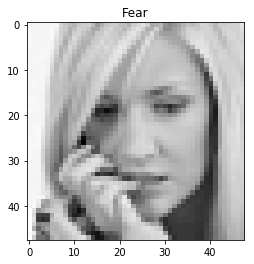

In [5]:
random_image_draw()

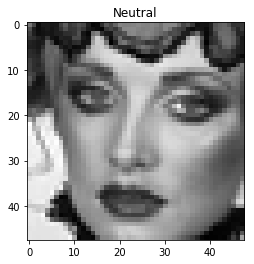

In [69]:
random_image_draw()

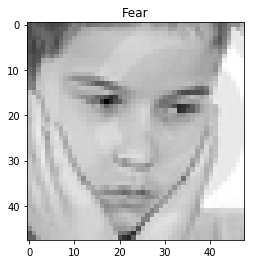

In [70]:
random_image_draw()

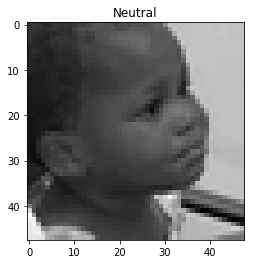

In [71]:
random_image_draw()

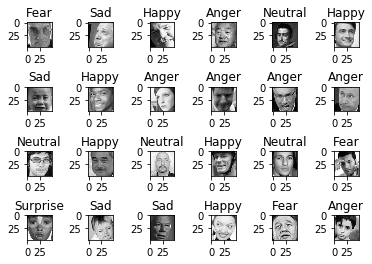

In [72]:
fig = plt.figure()
fig.subplots_adjust(hspace=1.6, wspace=1.2)
for i in range(1,25):
    ax = fig.add_subplot(4, 6, i)
    random_image_draw()

In [6]:
#################################################
# Datayi train ve test olark ayir
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("ogrenme kumesinin uzunlugu: ", len(X_train))
print("test kumesinin uzunlugu: ", len(X_test))

#################################################
# Datayi normalize et 
#.      Standardize features by removing the mean and scaling to unit variance
#.      Centering and scaling happen independently on each feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ogrenme kumesinin uzunlugu:  26915
test kumesinin uzunlugu:  8972


X_train.shape (2304, 26915)
y_train.shape (7, 26915)
 Error at iteration  0 / 10  is  1.6907176836195625
 Error at iteration  1 / 10  is  1.1266465132842034
 Error at iteration  2 / 10  is  0.9924579036018298
 Error at iteration  3 / 10  is  0.96434865727677
 Error at iteration  4 / 10  is  0.9536967842240877
 Error at iteration  5 / 10  is  0.9481640915600319
 Error at iteration  6 / 10  is  0.9447256928873485
 Error at iteration  7 / 10  is  0.9423098673265893
 Error at iteration  8 / 10  is  0.9404534487560429
 Error at iteration  9 / 10  is  0.9389292448573134
Time:  185.96598829701543
					---Our Own Neural Network---
confusion_matrix:
 [[123  12  94 523 365 141  10]
 [ 10   2   6  43  38  21   6]
 [114  16  97 481 365 228  13]
 [182  34 223 814 621 252  22]
 [134  11 122 667 383 173  17]
 [ 72   9  79 286 302 271  13]
 [182  17 161 541 427 230  19]]
accuracy_score:  0.19048149799375835


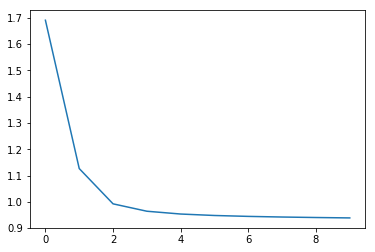

In [83]:
# Fitting Our Own Neural Network to the Training set
start_time = timeit.default_timer()
ysa = yapay_sinir_agi(katmanlar = [48*48,96,24,7])
ysa.fit(X_train_scaled,y_train, alpha = 0.0001, number_steps = 10)

tahmin = ysa.predict(X_test_scaled)
print("Time: ", timeit.default_timer() - start_time)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, tahmin)
print("\t\t\t\t\t---Our Own Neural Network---")
print("confusion_matrix:\n", cm)
print("accuracy_score: ", accuracy_score(y_test, tahmin))
plt.plot(ysa.H)

X_train.shape (2304, 26915)
y_train.shape (7, 26915)
 Error at iteration  0 / 100  is  1.9091545739124258
 Error at iteration  10 / 100  is  1.5256132264531257
 Error at iteration  20 / 100  is  1.2876946002369012
 Error at iteration  30 / 100  is  1.154782809552271
 Error at iteration  40 / 100  is  1.0765371828178782
 Error at iteration  50 / 100  is  1.0284329510981753
 Error at iteration  60 / 100  is  0.997787141224493
 Error at iteration  70 / 100  is  0.9774766135754809
 Error at iteration  80 / 100  is  0.9634465488088733
 Error at iteration  90 / 100  is  0.9533638316308649
Time:  370.8442605069722
					---Our Own Neural Network---
confusion_matrix:
 [[ 26  61  88 451 209 138 299]
 [  3  12   7  44  25   9  50]
 [ 39  89 105 339 236 165 313]
 [ 56 139 151 851 344 219 474]
 [ 46  89 127 502 281 141 314]
 [ 45  83  64 235 143 151 257]
 [ 49 109 163 562 172 145 352]]
accuracy_score:  0.19817209094962104


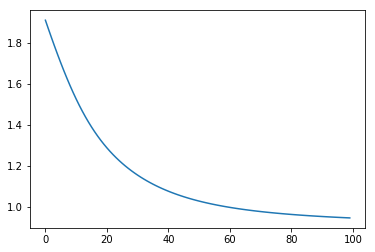

In [7]:
# Fitting Our Own Neural Network to the Training set
start_time = timeit.default_timer()
ysa = yapay_sinir_agi(katmanlar = [48*48,12,7])
ysa.fit(X_train_scaled,y_train, alpha = 0.00001, number_steps = 100)

tahmin = ysa.predict(X_test_scaled)
print("Time: ", timeit.default_timer() - start_time)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, tahmin)
print("\t\t\t\t\t---Our Own Neural Network---")
print("confusion_matrix:\n", cm)
print("accuracy_score: ", accuracy_score(y_test, tahmin))
plt.plot(ysa.H)

In [8]:
# Fitting Our Own Neural Network to the Training set
start_time = timeit.default_timer()
ysa = yapay_sinir_agi(katmanlar = [48*48,24,12,7])
ysa.fit(X_train_scaled,y_train, alpha = 0.0001, number_steps = 2000)

tahmin = ysa.predict(X_test_scaled)
print("Time: ", timeit.default_timer() - start_time)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, tahmin)
print("\t\t\t\t\t---Our Own Neural Network---")
print("confusion_matrix:\n", cm)
print("accuracy_score: ", accuracy_score(y_test, tahmin))
plt.plot(ysa.H)

X_train.shape (2304, 26915)
y_train.shape (7, 26915)
 Error at iteration  0 / 2000  is  1.8849643898538018


KeyboardInterrupt: 

In [16]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 48*48))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 7)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

ValueError: Error when checking target: expected dense_18 to have shape (None, 7) but got array with shape (26915, 1)

In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("\t\t\t\t\t---Keras Neural Network---")
print("confusion_matrix:\n", cm)
print("accuracy_score: ", accuracy_score(y_test, y_pred))

					---Keras Neural Network---
confusion_matrix:
 [[   0 1272    0    0    0    0    0]
 [   0  150    0    0    0    0    0]
 [   0 1286    0    0    0    0    0]
 [   0 2234    0    0    0    0    0]
 [   0 1500    0    0    0    0    0]
 [   0  978    0    0    0    0    0]
 [   0 1552    0    0    0    0    0]]
accuracy_score:  0.01671868033883192
